<a href="https://colab.research.google.com/github/dr-blockchains/deep-learning-pytorch/blob/main/NN_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

print(f"Torch version: {torch.__version__}")

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

Torch version: 2.6.0+cu124
cuda:0


In [ ]:
# Generate Some fake data:

np.random.seed(1)
torch.manual_seed(1)

n_samples = 1000
n_inputs = 5
n_outputs = 3

X = np.random.randn(n_samples, n_inputs)
noise = np.random.uniform(-1, 1, size=(n_samples,))

y1 = (1.5*X[:, 0] - 0.5*X[:, 1] + 0.1*X[:, 2] + noise > 0 ).astype(int)  # Linear
y2 = (0.7*X[:, 1] + 0.3*X[:, 2] + 0.5*X[:, 0]*X[:, 3] > 0.5).astype(int)  # With interaction
y3 = (np.sin(X[:, 0]) + np.exp(X[:, 4]/5) - 0.8*X[:, 2]**2 > 0).astype(int)  # Non-linear
Y = np.column_stack([y1, y2, y3])

X.shape, Y.shape, noise.shape

((1000, 5), (1000, 3), (1000,))

In [ ]:
# Split and prepare data:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train_scaled)
Y_train_tensor = torch.FloatTensor(Y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
Y_test_tensor = torch.FloatTensor(Y_test)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 5), (200, 5), (800, 3), (200, 3))

In [ ]:
# 1. Multivariate Logistic Regression:

lr_models = []
lr_predictions = np.zeros((X_test.shape[0], n_outputs))

for i in range(n_outputs):
    lr = LogisticRegression(C=1e6, random_state=2, max_iter=10000, tol=1e-8)
    lr.fit(X_train_scaled, Y_train[:, i])
    lr_models.append(lr)
    print(f"\n Coefficients: {lr.coef_[0]}, Intercept: {lr.intercept_[0]:.3f}")

    lr_predictions[:, i] = lr.predict(X_test_scaled)

    print(f"Output y{i+1} accuracy: {lr.score(X_test_scaled, Y_test[:, i])}")


 Coefficients: [ 4.44472931 -1.35182231  0.42692132 -0.09173283  0.02647955], Intercept: -0.043
Output y1 accuracy: 0.905

 Coefficients: [ 7.59742080e-02  3.15397081e+00  1.29388377e+00  7.81450637e-04
 -6.57632245e-02], Intercept: -2.254
Output y2 accuracy: 0.875

 Coefficients: [ 0.98616393 -0.06011731 -0.11439433 -0.11575603  0.50449216], Intercept: 0.708
Output y3 accuracy: 0.785


In [ ]:
# 2. Simple Neural Network:

class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

simple_nn = SimpleNN(n_inputs, n_outputs)
simple_nn

SimpleNN(
  (linear): Linear(in_features=5, out_features=3, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# 3. Neural Network with one hidden layer with ReLU activation function:

class OneHiddenNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(OneHiddenNN, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

one_hidden = OneHiddenNN(n_inputs, 8, n_outputs)
one_hidden

OneHiddenNN(
  (model): Sequential(
    (0): Linear(in_features=5, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=3, bias=True)
    (3): Sigmoid()
  )
)

In [ ]:
# 4. The Neural Network with two hidden layers:

class TwoHiddenNN(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        super(TwoHiddenNN, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

two_hidden = TwoHiddenNN(n_inputs, 8, 6, n_outputs)
two_hidden

TwoHiddenNN(
  (model): Sequential(
    (0): Linear(in_features=5, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=3, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
# 5. Neural Network with one linear hidden layer:

class LinearHiddenNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearHiddenNN, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

linear_hidden = LinearHiddenNN(n_inputs, 2, n_outputs)
linear_hidden

LinearHiddenNN(
  (model): Sequential(
    (0): Linear(in_features=5, out_features=2, bias=True)
    (1): Linear(in_features=2, out_features=3, bias=True)
    (2): Sigmoid()
  )
)

In [ ]:
# Function to train the Neural Network models:

def train_model(model, X_train, Y_train, max_epochs=9000, lr=0.01, tol=1e-17):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr)

    model.train()

    losses = []
    prev_loss = float('inf')

    for epoch in range(max_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, Y_train)
        losses.append(loss.item())
        current_loss = loss.item()

        if abs(prev_loss - current_loss) < tol:
            print(f"Converged at epoch {epoch} with loss {current_loss:.8f}")
            break

        if (epoch) % 100 == 0:
            print(f"Epoch [{epoch}/{max_epochs}], Loss: {loss.item():.4f}")

        prev_loss = current_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch == max_epochs - 1:
        print(f"Reached max epochs ({max_epochs}) with loss {current_loss:.8f}")

    return losses

In [ ]:
# Training Models and Obtaining Losses:
print("\n Simple NN Training: ")
simple_losses = train_model(simple_nn, X_train_tensor, Y_train_tensor)

print("\n One Hidden NN Training: ")
one_hidden_losses = train_model(one_hidden, X_train_tensor, Y_train_tensor)

print("\n Two Hidden NN Training: ")
two_hidden_losses = train_model(two_hidden, X_train_tensor, Y_train_tensor)

# print("\n Linear Hidden NN Training: ")
# linear_hidden_losses = train_model(one_hidden, X_train_tensor, Y_train_tensor)



 Simple NN Training: 
Epoch [0/9000], Loss: 0.6793
Epoch [100/9000], Loss: 0.4563
Epoch [200/9000], Loss: 0.4091
Epoch [300/9000], Loss: 0.3892
Epoch [400/9000], Loss: 0.3789
Epoch [500/9000], Loss: 0.3730
Epoch [600/9000], Loss: 0.3695
Epoch [700/9000], Loss: 0.3673
Epoch [800/9000], Loss: 0.3659
Epoch [900/9000], Loss: 0.3651
Epoch [1000/9000], Loss: 0.3645
Epoch [1100/9000], Loss: 0.3641
Epoch [1200/9000], Loss: 0.3639
Epoch [1300/9000], Loss: 0.3637
Epoch [1400/9000], Loss: 0.3636
Epoch [1500/9000], Loss: 0.3636
Epoch [1600/9000], Loss: 0.3635
Epoch [1700/9000], Loss: 0.3635
Epoch [1800/9000], Loss: 0.3635
Epoch [1900/9000], Loss: 0.3635
Converged at epoch 1904 with loss 0.36349094

 One Hidden NN Training: 
Epoch [0/9000], Loss: 0.6814
Epoch [100/9000], Loss: 0.2989
Epoch [200/9000], Loss: 0.1786
Epoch [300/9000], Loss: 0.1491
Epoch [400/9000], Loss: 0.1378
Epoch [500/9000], Loss: 0.1307
Epoch [600/9000], Loss: 0.1263
Epoch [700/9000], Loss: 0.1232
Epoch [800/9000], Loss: 0.1208


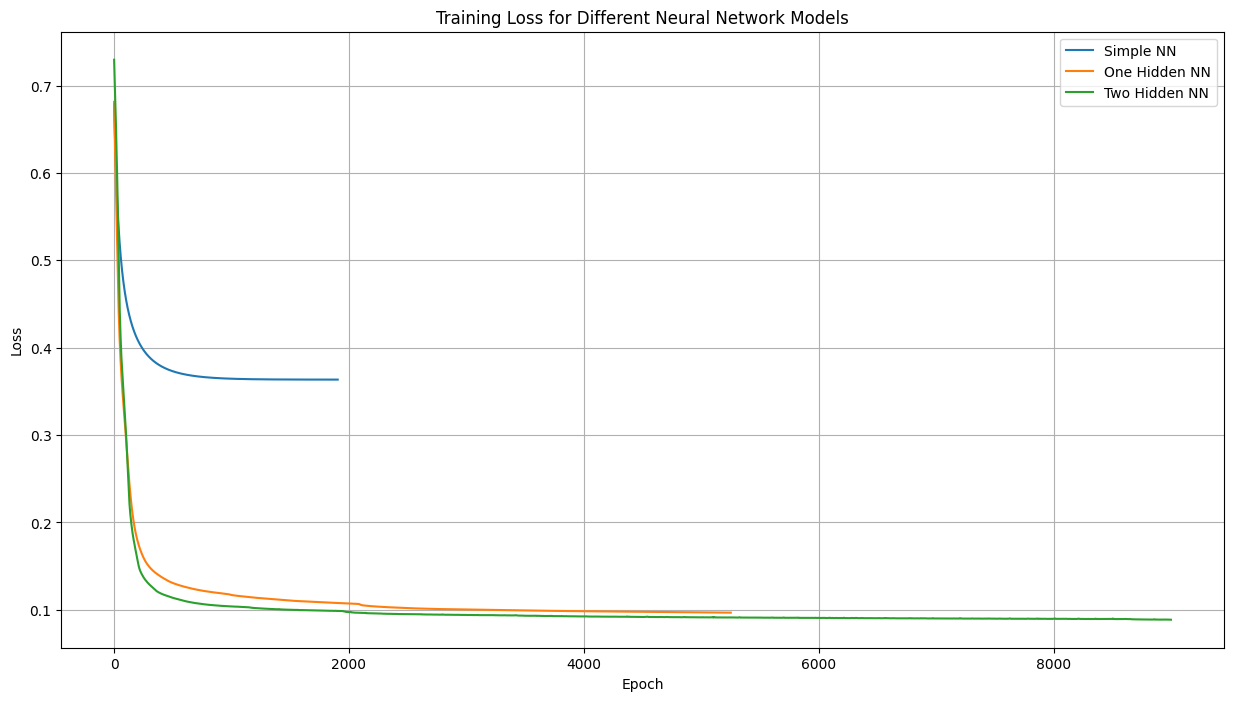

In [ ]:
# Plots for the losses:

plt.figure(figsize=(15, 8))
plt.plot(simple_losses, label='Simple NN')
plt.plot(one_hidden_losses, label='One Hidden NN')
plt.plot(two_hidden_losses, label='Two Hidden NN')
# plt.plot(linear_hidden_losses, label='Linear Hidden NN')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Different Neural Network Models')

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Function to Evaluate the Neural Network Models:

def evaluate_model(y_true, y_pred, message):
    accuracies = []
    print(f"\n--- {message} Results ---")

    for i in range(n_outputs):
        acc = (y_true[:, i] == y_pred[:, i]).mean()
        accuracies.append(acc)
        print(f"Output y{i+1} Accuracy: {acc:.4f}")

    # print(f"Average Accuracy: {np.mean(accuracies):.4f}")
    return accuracies

In [ ]:
# Prediction and Evaluations:

simple_nn.eval()
linear_hidden.eval()
one_hidden.eval()
two_hidden.eval()

with torch.no_grad():
    simple_nn_pred = (simple_nn(X_test_tensor) > 0.5).float().numpy()
    linear_nn_pred = (linear_hidden(X_test_tensor) > 0.5).float().numpy()
    one_nn_pred = (one_hidden(X_test_tensor) > 0.5).float().numpy()
    two_nn_pred = (two_hidden(X_test_tensor) > 0.5).float().numpy()

lr_accuracies = evaluate_model(Y_test, lr_predictions, "Multivariate Logistic Regression")
simple_nn_accuracies = evaluate_model(Y_test, simple_nn_pred, "PyTorch NN (No Hidden Layers)")
one_nn_accuracies = evaluate_model(Y_test, one_nn_pred, "PyTorch NN (With One ReLU Hidden Layer)")
two_nn_accuracies = evaluate_model(Y_test, two_nn_pred, "PyTorch NN (With Two Hidden Layers)")
# linear_nn_accuracies = evaluate_model(Y_test, linear_nn_pred, "PyTorch NN (With One Linear Hidden Layer)")


--- Multivariate Logistic Regression Results ---
Output y1 Accuracy: 0.9050
Output y2 Accuracy: 0.8750
Output y3 Accuracy: 0.7850

--- PyTorch NN (No Hidden Layers) Results ---
Output y1 Accuracy: 0.9050
Output y2 Accuracy: 0.8750
Output y3 Accuracy: 0.7850

--- PyTorch NN (With One ReLU Hidden Layer) Results ---
Output y1 Accuracy: 0.9050
Output y2 Accuracy: 0.9650
Output y3 Accuracy: 0.9550

--- PyTorch NN (With Two Hidden Layers) Results ---
Output y1 Accuracy: 0.8950
Output y2 Accuracy: 0.9350
Output y3 Accuracy: 0.9450


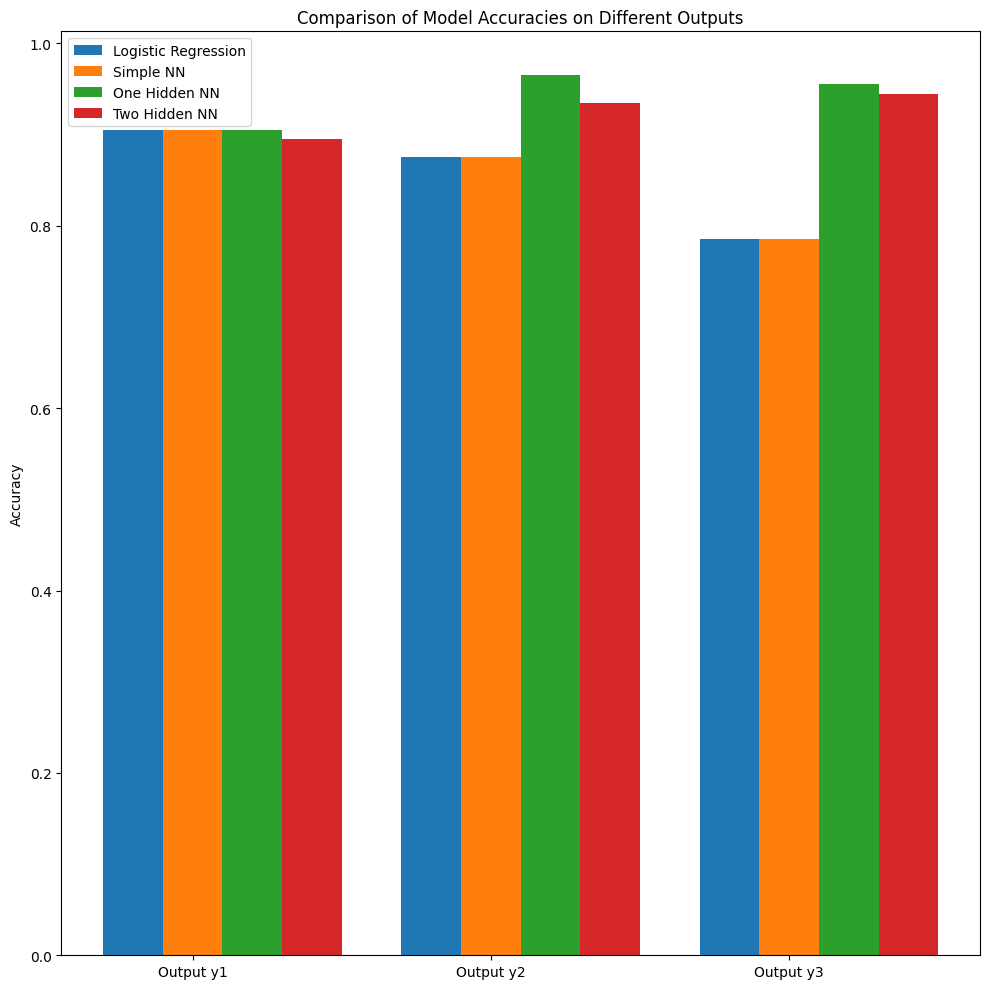

In [ ]:
# Barcharts to Compare the Accuracies across Models:

labels = ['Output y1', 'Output y2', 'Output y3']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width, lr_accuracies, width, label='Logistic Regression')
rects2 = ax.bar(x, simple_nn_accuracies, width, label='Simple NN')
rects3 = ax.bar(x + width, one_nn_accuracies, width, label='One Hidden NN')
rects4 = ax.bar(x + 2*width, two_nn_accuracies, width, label='Two Hidden NN')
#rects5 = ax.bar(x, linear_nn_accuracies, width, label='One Linear Hidden NN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies on Different Outputs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adjust layout to prevent labels from overlapping
fig.tight_layout()

plt.show()


In [ ]:
# Compare weights and coefficients:

print("\n--- Weight Comparison: Logistic Regression vs Simple Neural Network ---")
with torch.no_grad():
    for i in range(n_outputs):
        print(f"\nOutput y{i+1}:")
        # Extract sklearn logistic regression weights (coefficients and intercept)
        lr_weights = np.concatenate([lr_models[i].coef_[0], [lr_models[i].intercept_[0]]])

        # Extract PyTorch weights (weights and bias)
        nn_weights = np.concatenate([
            simple_nn.linear.weight.data[i].numpy(),
            [simple_nn.linear.bias.data[i].numpy()]
        ])

        print(f"Logistic Regression Coefficients: {lr_weights.round(4)}")
        print(f"Simple NN weights: {nn_weights.round(4)}")
        print(f"Mean absolute difference: {np.mean(np.abs(lr_weights - nn_weights)):.6f}")


--- Weight Comparison: Logistic Regression vs Simple Neural Network ---

Output y1:
Logistic Regression Coefficients: [ 4.4447 -1.3518  0.4269 -0.0917  0.0265 -0.0434]
Simple NN weights: [ 4.3683 -1.3333  0.4201 -0.0893  0.0271 -0.041 ]
Mean absolute difference: 0.017873

Output y2:
Logistic Regression Coefficients: [ 7.6000e-02  3.1540e+00  1.2939e+00  8.0000e-04 -6.5800e-02 -2.2541e+00]
Simple NN weights: [ 7.5900e-02  3.1487e+00  1.2920e+00  8.0000e-04 -6.5500e-02 -2.2508e+00]
Mean absolute difference: 0.001797

Output y3:
Logistic Regression Coefficients: [ 0.9862 -0.0601 -0.1144 -0.1158  0.5045  0.7081]
Simple NN weights: [ 0.9862 -0.0601 -0.1144 -0.1158  0.5045  0.7081]
Mean absolute difference: 0.000000
